# Introduction

Logistic Regression is a classificaiton algorithm used to classify the observations. Unlike linear regression, this doesn't predict numerical values but rather identifies specific class a sample belongs to. Here, we'll just address the case of binary classificaiton in which the task is to simply predict if the sample belongs to a class or not. So, positive cases can be coded by $1$ and negative ones by $0$.

The hypothesis function is defined by the sigmoid function as below:
$$h(z) = \frac{1}{1 + e^{-z}}$$
This would usually return the probability of $z$. After that we need to assign the class it belongs to. For that, we set some threshold (usually 0.5) to decide which class the sample belongs to. The $z$ in the above equation is modelled as a multiple linear regression equation,
$$z = w^Tx$$
$$h_w(x) = \frac{1}{1 + e^{-w^Tx}}$$

Next we need to define the cost function which can be then minimized using Gradient Descent. The cost function for linear regression (Ordinary Least Squares) cannot be used for a variety of reasons. One prominent reason is the non-convexity of the OLS for the case of logistic regression. Rather, the log loss function is used,
$$J(w) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_w(x^{(i)})) + (1 - y^{(i)})log(1 - h_w(x^{(i)}))]$$

To use gradient descent, we need to find the gradient of this cost function. On solving, these are the results:
$$\nabla h(z) = h(z)(1 - h(z))$$
$$\nabla J(w) = \frac{1}{m}\sum_{i=1}^{m}[h_w(x^{(i)}) - y^{(i)}]x^{(i)}$$

Now, grdient descent can be applied to minimize the cost function. Using the minimized coefficients, we can predict the probability of a sample. Then the probability can be converted to class using a predefined threshold.

# Logistic Regression in python

For the gradient descent algorithm, we'll reuse the 'GradientDescent' class defined previously <a href="https://github.com/soumyasanyal/machinelearning/blob/master/Regression/GradientDescent.py">here</a>. For data simulation, we'll take inspirations from <a href="https://stats.stackexchange.com/questions/12857/generate-random-correlated-data-between-a-binary-and-a-continuous-variable/12858#12858">this post</a>. We need to compute the probability of success and then sample the response from a bernoulli distribution.

Sample logistic function which is being predicted: y = 3 +5*x1 - 2*x2


Gradient descent logloss: batch with no adaptive learning


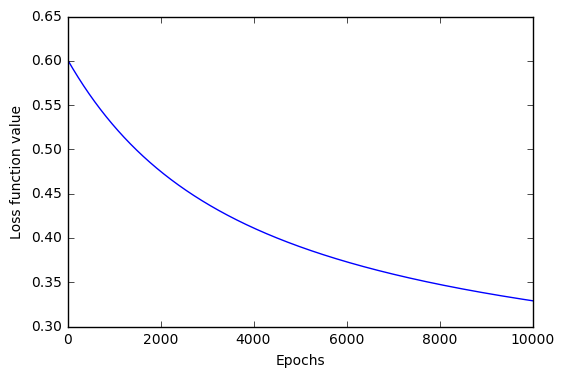

Optimized Coefficients: [[ 0.9709941 ]
 [ 1.40144576]
 [-0.694668  ]]
R squared score:  [ 0.59591064]


Gradient descent logloss: batch with adaptive learning


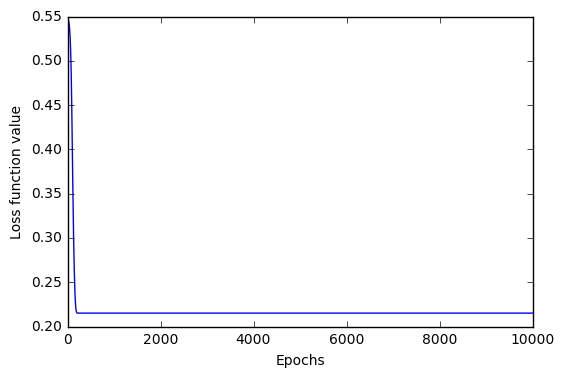

Optimized Coefficients: [[ 3.10593117]
 [ 4.90515845]
 [-2.35558892]]
R squared score:  [ 0.74014405]


Gradient descent logloss: stochastic with no adaptive learning


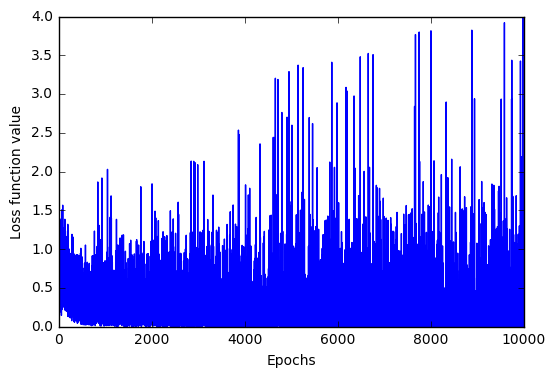

Optimized Coefficients: [[ 2.12567587]
 [ 3.47219766]
 [-1.7143862 ]]
R squared score:  [ 0.72662648]


In [34]:
import GradientDescent as GrD
import numpy as np
import importlib

def randomSampleGenerator(n):
    x1 = np.random.normal(size=n)
    x2 = np.random.normal(size=n)
    z = 3 + 5 * x1 - 2 * x2
    p = np.exp(z) / (1 + np.exp(z))
    y = np.random.binomial(1, p)
    return [np.column_stack((np.ones(n), x1, x2)).reshape(-1,3), np.array([y]).reshape(-1,1)]

if __name__ == "__main__":
    # This is required so that the changes are picked up properly by the Jupyter notebook
    importlib.reload(GrD)
    
    N_samples = 1000
    [X, Y] = randomSampleGenerator(N_samples)
    print('Sample logistic function which is being predicted: y = 3 +5*x1 - 2*x2')
    [X_train, Y_train ] = [X[0:int(0.7*N_samples),:], Y[0:int(0.7*N_samples)]]
    [X_test, Y_test ] = [X[int(0.7*N_samples):N_samples,:], Y[int(0.7*N_samples):N_samples]]

    GD = GrD.GradientDescent(method="batch", loss="logloss", lr=0.001, epochs=10000)
    print('\n\nGradient descent logloss: batch with no adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))
    
    GD = GrD.GradientDescent(method="batch", loss="logloss", lr=0.001, epochs=10000, adaptive=True)
    print('\n\nGradient descent logloss: batch with adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))

    GD = GrD.GradientDescent(method="stochastic", loss="logloss", lr=0.01, epochs=10000)
    print('\n\nGradient descent logloss: stochastic with no adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('R squared score: ', GD.score(Y_test, YPredict))